# SI 370: Homework 3: Speed Dating

The background material and motivation for this assignment is based on work by Anna Shen on a dataset provided by Anna Montoya from the Kaggle Team.

### About the data (quoted from Anna Shen):
* Data was gathered from 552 participants in experimental speed dating events from 2002-2004. 
* During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. 
* At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: 
  * Attractiveness
  * Sincerity
  * Intelligence
  * Fun
  * Ambition
  * Shared Interests.
* The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: 
  * demographics
  * dating habits
  * self-perception across key attributes
  * beliefs on what others find valuable in a mate
  * lifestyle information

See the speed-dating-data-key.doc for data dictionary and question key.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.options.display.max_rows = 1000 #handy for showing truncated results


In [4]:
dating = pd.read_csv('data/speed-dating-experiment/Speed Dating Data.csv',encoding='ISO-8859-1')

In [5]:
dating.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dating.iloc[0]

Let's drop a bunch of columns so we're left with only the relevant ones.  You might choose to incorporate additional columns to help you answer the questions but the following reduction yields a dataset that will allow you to adequately answer the questions below.


In [7]:
# narrowing dataset
dating_1 = dating.iloc[:, 11:28]
dating_2 = dating.iloc[:, 30:35]
dating_3 = dating.iloc[:, 39:43]
dating_4 = dating.iloc[:, 45:67]
dating_5 = dating.iloc[:, 69:74]
dating_6 = dating.iloc[:, 87:91]
dating_7 = dating.iloc[:, 97:102]
dating_8 = dating.iloc[:, 104:107]

dating_narrowed = pd.concat([dating.iloc[:, 0],dating.iloc[:, 2],dating.iloc[:, 9],dating_1,dating_2,dating_3,dating_4,dating_5,
                  dating_6,dating_7,dating_8], axis=1)

### <font color='red'>Q1: Visualize the distribution of the ages of the participants and provide summary statistics of that distribution</font>

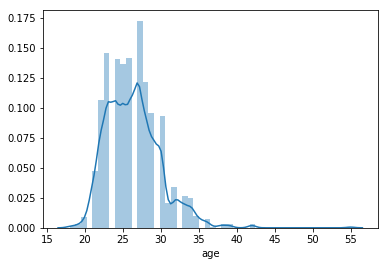

In [8]:
sns.distplot(dating_narrowed.age.dropna())

In [9]:
dating.age.describe()

count    8283.000000
mean       26.358928
std         3.566763
min        18.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        55.000000
Name: age, dtype: float64

 ### <font color='red'>Q2: What proportion of speed daters found a match? </font>

In [10]:
matches = pd.crosstab(index=dating['match'],columns="count")

In [11]:
matches

col_0,count
match,
0,6998
1,1380


In [12]:
len(dating[dating.match == 1])

1380

In [13]:
len(dating[dating.match == 0])

6998

In [14]:
dating.order.value_counts()

1     551
5     551
2     551
4     551
3     551
6     541
7     514
8     508
9     502
10    474
14    372
13    372
12    372
11    372
15    334
16    304
18    253
17    253
19    178
20    144
21     86
22     44
Name: order, dtype: int64

In [15]:
date4.intel.value_counts()

NameError: name 'date4' is not defined

In [ ]:
date4.dec.value_counts()

### <font color='red'>Q3: Visualize the correlations between the variables in the dataset and comment on at least 3 interesting correlations.</font>

In [ ]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = dating_narrowed.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### <font color='red'>Q4: Do women receive more positive final decisions from the other person (dec_o) than men do? </font>
Please provide a visualization and statistical test.

Hint: chi-squared and mosaic plots might be good choices

In [ ]:
import statsmodels.api as sm

In [ ]:
# chi-square test
gender_crosstab = pd.crosstab(index=dating_narrowed.gender, columns=dating_narrowed.dec_o)
gender_table = sm.stats.Table(gender_crosstab)
gender_rslt = gender_table.test_nominal_association()
gender_rslt.pvalue

In [ ]:
gender_rslt.pvalue


In [ ]:
gender_crosstab

In [ ]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(gender_crosstab)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
t = mosaic(dating_narrowed, ['gender','dec_o'],title='gender selectivity')

### Q5: Between attractiveness, sincerity, intelligence, fun,  and liking, what was the most influential in the final decision (dec)?

Hint: Regression would be a good choice here

In [ ]:
date4 = dating_narrowed.dropna()

In [ ]:
X_ols = date4[['attr','sinc','intel','fun','like','int_corr']]
y_ols = date4.dec
traits = sm.OLS(y_ols, X_ols)
results_traits = traits.fit()
results_traits.summary()

### <font color='red'>Q6: Does the order in which speed daters meet each other matter in terms of final outcome (matches)? </font>

Please answer with a statistical test.

Hint: ANOVA might be a good choice

Note: It may be better to create a categorical variable based on whether the pair met "early" or "late" than it is to just use the "order" column

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
dating_lm = ols('dec ~ order', data=dating).fit()
table = sm.stats.anova_lm(dating_lm, typ=2) # Type 2 ANOVA DataFrame
table

In [ ]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

In [ ]:
res2 = pairwise_tukeyhsd(dating['dec'], dating['order'])
res2.summary()